# 08. 이미지를 위한 인공 신경망

# 08-01. 합성곱 신경망의 구성 요소

## 합성곱 신경망(convolutional neural network, CNN)
- 하나 이상의 합성곱 층을 사용하는 인공 신경망을 의미한다.
- 합성곱 층: 입력값에 대하여 일정한 크기의 필터를 점진적으로 이동시키며 출력을 구하는 층으로 '각 입력값 x 가중치'를 모두 합한 값이 출력이 된다.
- 필터(filter): 합성곱 신경망에서 뉴런 대신 쓰이는 명칭으로 여러 개의 가중치가 하나의 필터를 구성한다.   
필터는 입력값의 형태에 따라 다차원의 가중치로 구성될 수 있으며 입력값보다 크기가 작다.   
입력에 곱해지는 가중치를 의미하는 커널(kernel)과도 같은 의미로 쓰인다.

### 2차원 배열에 합성곱 신경망 적용하기
- 입력이 2차원 배열이라면 필터도 2차원 배열이다.
- 필터를 왼쪽 위에서부터 오른쪽으로 한칸씩, 끝까지 갔다면 다시 한 칸 아래 왼쪽으로 이동시키며 연산을 수행한다.
- 각 연산의 출력은 특성 맵(feature map)이라는 2차원 배열에 저장된다. 이 때 저장되는 위치는 필터가 놓인 위치에 따라 배치된다.   
특성 맵은 보통 입력 배열에 비해 크기가 작다.
  - ex) 필터가 왼쪽 위에서 연산한 결과는 배열의 (0, 0)에, 한 칸 오른쪽으로 이동한 필터는 (0, 1)에 위치하게 된다.
  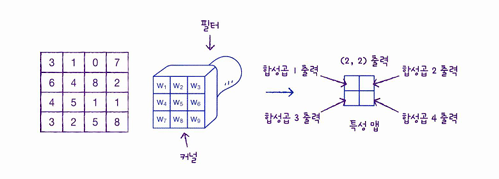
- 여러 개의 필터를 사용해 얻은 특성 맵은 차곡차곡 쌓여 3차원 배열을 구성한다.
  - ex) (2, 2) 크기의 특성 맵 3개를 쌓으면 (2, 2, 3) 크기의 3차원 배열이 된다.

## 케라스 합성곱 층
- 합성곱 층은 keras.layers 내부에 구현되어 있으며, 입력 위를 슬라이딩하며 출력을 계산하는 합성곱은 특별히 Conv2D 클래스로 제공된다.
```python
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
```
- 순서대로 필터의 개수, 커널의 크기, 활성화 함수를 지정하는 하이퍼파라미터이다.


## 합성곱 신경망에서 사용되는 여러 기법

### 패딩(padding)
- 입력 배열 주위를 값이 0인 가상의 원소로 채우는 것을 의미한다. 값이 0이기 때문에 계산의 영향을 미치지 않으며 하나의 필터를 더 여러 번 사용하는 효과가 있다.
- 패딩을 통해 특성 맵을 입력 배열과 동일한 크기로 만드는 것을 세임 패딩(same padding)이라고 하며, 패딩 없이 순수한 입력 배열만 사용하는 것을 밸리드 패딩(valid padding)이라고 한다. 합성곱 신경망에서는 세임 패딩을 자주 사용한다.
- Conv2D 클래스의 padding 매개변수를 'same'으로 설정해 세임 패딩을 사용할 수 있다.(default: 'valid')
```python
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu',padding='same')
```

#### 패딩을 사용하는 이유
- 패딩을 사용하지 않으면 배열의 가장자리(특히 모서리)가 중심부에 비해 덜 연산되기 때문에 결과에 미치는 영향도 감소하게 된다.
- 패딩을 통해 이 차이를 줄일 수 있으며 충분한 수의 픽셀을 패딩하면 연산 비율을 1:1로 만들 수 있다.
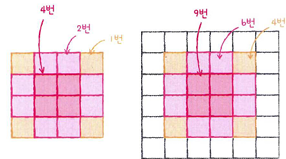
  - 그러나 패딩의 크기를 지나치게 늘리면 연산 비용이 증가하며 오히려 중요한 정보를 처리하는데 방해가 될 수 있으므로 적절한 크기를 결정하는 것이 중요하다.   
  1:1에 가까운 비율이 좋은 성능을 의미하지는 않는다.

### 스트라이드(stride)
- 필터가 이동하는 크기를 의미하며 크기를 늘릴수록 한번에 더 많은 칸을 이동한다.(default: 1)
- 크기를 늘릴수록 하나의 필터를 더 적게 사용하는 효과가 있다. 따라서 특성 맵의 크기도 작아진다.
- 일반적으로 1보다 큰 값은 거의 사용하지 않으며 기본값을 그대로 사용한다.
- Conv2D 클래스의 strides 매개변수에 크기를 입력하여 사용한다.
```python
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu',padding='same', strides=1)
```
  - (1, 1)와 같이 튜플의 형태로 입력하면 오른쪽으로 이동하는 크기와 아래로 이동하는 크기를 서로 다르게 설정할 수 있지만 마찬가지로 거의 사용하지 않는다.

### 풀링(pooling)
- 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다.   
특성 맵의 개수는 줄이지 않는다.
  - ex. (2, 2, 3) → (1, 1, 3)
- 필터와 유사하게 입력 위를 슬라이딩하지만 연산의 범위가 겹치지 않게 이동한다.(스드라이드가 풀링의 크기)   
또한 가중치 없이 단순하게 최댓값 혹은 평균값을 구하는 연산을 수행한다.   
각각 최대 풀링(max pooling), 평균 풀링(average pooling)이라고 부른다.
- keras.layers에 MaxPooling을 통해 최대 풀링을 수행할 수 있다.
```python
keras.layers.MaxPooling(2)
keras.layers.MaxPooling(2, strides=2, padding='valid')  # 위와 동일한 코드
```
  - 일반적으로 풀링의 크기만 지정한다.
- 평균 풀링은 AveragePooling2D 클래스를 사용한다.   
평균 풀링은 중요한 정보를 희석시킬 수 있기 때문에 최대 풀링을 주로 사용한다.
- 특성 맵이 풀링의 크기로 나누어 떨어지지 않아 일부가 남았을 경우에는 남은 데이터를 무시하거나, 남은 데이터 내에서 연산을 수행하는 방식으로 처리한다.

## 합성곱 신경망의 전체 구조
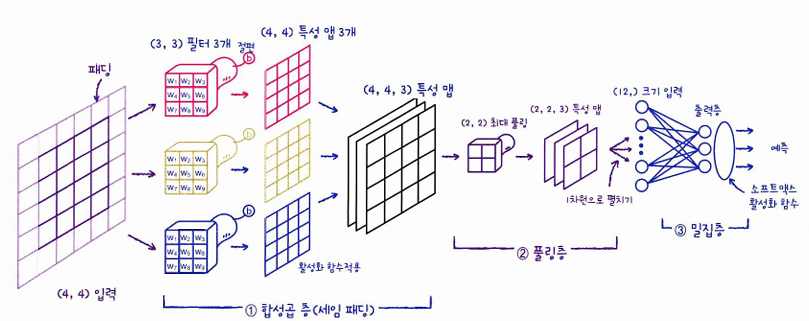

## 컬러 이미지에서의 합성곱
- 컴퓨터는 컬러 이미지를 3차원 배열로 처리한다.(너비, 높이, 깊이(RGB))
- 따라서 필터 역시 동일하게 3차원 배열 형태이며 필터의 깊이는 항상 입력 배열의 깊이와 동일하다.
- 케라스의 합성곱 층은 기본적으로 3차원 배열을 기대하며, 흑백 이미지는 깊이가 1인 배열로 변환하여 전달한다.
- 마찬가지로 풀링 층을 통과한 3차원 배열을 다시 합성곱 층의 입력으로 사용할 경우에도 3차원 배열 필터를 사용한다.
- 합성곱 신경망에서 입력 배열은 각종 필터와 풀링을 거치고 겹쳐지기를 반복하면서 너비와 높이는 줄고 깊이는 깊어지는 특징을 보인다.